In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from os import path
from experanto.datasets import ChunkDataset, SimpleChunkedDataset
from experanto.utils import LongCycler, MultiEpochsDataLoader

In [2]:
from experanto.configs import DEFAULT_MODALITY_CONFIG as cfg

In [3]:
cfg.screen.interpolation

{'rescale': True, 'rescale_size': [144, 256]}

In [4]:
cfg

{'screen': {'sampling_rate': None, 'chunk_size': None, 'valid_condition': {'tier': 'train'}, 'offset': 0, 'sample_stride': 4, 'include_blanks': True, 'transforms': {'ToTensor': {'_target_': 'torchvision.transforms.ToTensor'}, 'Normalize': {'_target_': 'torchvision.transforms.Normalize', 'mean': 80.0, 'std': 60.0}, 'Resize': {'_target_': 'torchvision.transforms.Resize', 'size': [144, 256]}, 'CenterCrop': {'_target_': 'torchvision.transforms.CenterCrop', 'size': 144}}, 'interpolation': {}}, 'responses': {'sampling_rate': None, 'chunk_size': None, 'offset': 0.1, 'transforms': {'standardize': True}, 'interpolation': {'interpolation_mode': 'nearest_neighbor'}}, 'eye_tracker': {'sampling_rate': None, 'chunk_size': None, 'offset': 0, 'transforms': {'normalize': True}, 'interpolation': {'interpolation_mode': 'nearest_neighbor'}}, 'treadmill': {'sampling_rate': None, 'chunk_size': None, 'offset': 0, 'transforms': {'normalize': True}, 'interpolation': {'interpolation_mode': 'nearest_neighbor'}}}

In [7]:
some_dict = {'transforms': {'ToTensor': {'_target_': 'torchvision.transforms.ToTensor'}, 'Normalize': {'_target_': 'torchvision.transforms.Normalize', 'mean': 80.0, 'std': 60.0}, 'Resize': {'_target_': 'torchvision.transforms.Resize', 'size': [144, 256]}, 'CenterCrop': {'_target_': 'torchvision.transforms.CenterCrop', 'size': 144}}}

In [22]:
cfg2 = instantiate(some_dict)

In [ ]:
cfg2=instantiate(cfg)

In [12]:
from torchvision import transforms

In [18]:
cfg2.transforms

{'ToTensor': ToTensor(), 'Normalize': Normalize(mean=80.0, std=60.0), 'Resize': Resize(size=[144, 256], interpolation=bilinear, max_size=None, antialias=True), 'CenterCrop': CenterCrop(size=(144, 144))}

In [24]:
tf = transforms.Compose([v for v in cfg2.transforms.values()])

In [ ]:
tf

In [ ]:
cfg.

In [12]:
np.load("/data/mouse_polly/dynamic29514-2-9-Video-full/screen/meta/stds.npy").shape

(144, 256)

In [24]:
dataset

NameError: name 'dataset' is not defined

In [18]:
dir(cfg)

NameError: name 'cfg' is not defined

In [44]:
print(OmegaConf.to_yaml(cfg))

screen:
  sampling_rate: null
  chunk_size: null
  valid_condition:
    tier: test
    stim_type: stimulus.Frame
  offset: 0
  sample_stride: 4
  include_blanks: false
  transforms:
    ToTensor:
      _target_: torchvision.transforms.ToTensor
    Normalize:
      _target_: torchvision.transforms.Normalize
      mean: 80.0
      std: 60.0
    Resize:
      _target_: torchvision.transforms.Resize
      size:
      - 144
      - 256
    CenterCrop:
      _target_: torchvision.transforms.CenterCrop
      size: 144
  interpolation: {}
responses:
  sampling_rate: null
  chunk_size: null
  offset: 0.1
  transforms:
    standardize: true
  interpolation:
    interpolation_mode: nearest_neighbor
eye_tracker:
  sampling_rate: null
  chunk_size: null
  offset: 0
  transforms:
    normalize: true
  interpolation:
    interpolation_mode: nearest_neighbor
treadmill:
  sampling_rate: null
  chunk_size: null
  offset: 0
  transforms:
    normalize: true
  interpolation:
    interpolation_mode: neares

In [6]:
def lets_see(**kwargs):
    return kwargs

In [9]:
lets_see(**cfg.dataset)

{'modality_config': {'responses': {'sampling_rate': 8, 'chunk_size': 16, 'offset': 0, 'sample_stride': 4, 'transforms': [{'name': 'ToTensor'}, {'name': 'Normalize', 'mean': [0.5], 'std': [0.5]}]}}}

In [10]:
cfg.paths

''

In [13]:
from torchvision import transforms

In [14]:
transforms.ToTensor()


ToTensor()

In [50]:
tf = transforms.Normalize(125, std=66)

In [51]:
tf(torch.ones(1,100,100)*0)

tensor([[[-1.8939, -1.8939, -1.8939,  ..., -1.8939, -1.8939, -1.8939],
         [-1.8939, -1.8939, -1.8939,  ..., -1.8939, -1.8939, -1.8939],
         [-1.8939, -1.8939, -1.8939,  ..., -1.8939, -1.8939, -1.8939],
         ...,
         [-1.8939, -1.8939, -1.8939,  ..., -1.8939, -1.8939, -1.8939],
         [-1.8939, -1.8939, -1.8939,  ..., -1.8939, -1.8939, -1.8939],
         [-1.8939, -1.8939, -1.8939,  ..., -1.8939, -1.8939, -1.8939]]])

In [35]:
255/2

127.5

In [3]:
root

PosixPath('/data/experanto')

In [5]:
config_name="config.yaml"
path.join(root, "configs", config_name)

'/data/experanto/configs/config.yaml'

In [19]:

config_path=str(root / "configs") + "/" + config_name

In [20]:
config_path

'/data/experanto/configs/config.yaml'

In [13]:
config_path

'/data/experanto/configsconfig.yaml'

In [21]:
import omegaconf
cfg = omegaconf.OmegaConf.load(config_path)

In [4]:
cfg

{'dataset': {'modality_config': {'responses': {'sampling_rate': 8, 'chunk_size': 16, 'offset': 0, 'sample_stride': 4, 'transforms': [{'name': 'ToTensor'}, {'name': 'Normalize', 'mean': [0.5], 'std': [0.5]}]}}}, 'dataloaders': {'batch_size': 32, 'shuffle': True, 'num_workers': 4, 'pin_memory': True, 'drop_last': True, 'prefetch_factor': 1}, 'paths': '', 'interp_config': {}, 'chunk_size': 16, 'sampling_rate': 8, 'tier': 'train', 'sample_stride': 4, 'include_blanks': True}

In [ ]:
"version_base": "1.3",

In [15]:
import hydra
from omegaconf import DictConfig
import os

from hydra import initialize, compose, initialize_config_dir
from omegaconf import OmegaConf

with initialize_config_dir(version_base="1.3", config_dir=str(root / "configs"), ):
    cfg = compose(config_name='config.yaml')
    print(OmegaConf.to_yaml(cfg))

NameError: name 'root' is not defined

# Simple Dataset

In [13]:
root_folder = "/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/"
#root_folder="./dynamic29228-2-10-Video-sensorium23_sanitycheck_times_fixed/"
chunk_size = 80 
sample_stride=40
dataset = SimpleChunkedDataset(root_folder=root_folder, 
                       chunk_size=chunk_size, 
                       sampling_rate=8,
                      )

In [14]:
datapoint = dataset[0]
for k, v in datapoint.items():
    print(k, v.shape)

responses (80, 7928)
screen (80, 1, 144, 256)
eye_tracker (80, 4)
treadmill (80, 1)
timestamps (80, 7928)


In [4]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=8, 
                        shuffle=True, 
                        num_workers=12,
                        prefetch_factor=1,
                        persistent_workers=True)
for b in tqdm(dataloader):
    #gpu_tensor = b["screen"].cuda()
    pass

100% 92/92 [00:05<00:00, 16.06it/s]


# New Chunkset

In [4]:
from experanto.datasets import DEFAULT_MODALITY_CONFIG as modality_config

In [13]:
modality_config.screen.valid_condition = {'tier': 'train'}
modality_config.screen.include_blanks = False
modality_config.screen.sample_stride = 4

In [14]:
root_folder = "/data/mouse_polly/dynamic29623-4-9-Video-full/"
dataset = ChunkDataset(root_folder=root_folder, 
                       modality_config=modality_config,
                       global_chunk_size=16,
                       global_sampling_rate=8)

responses torch.Size([1, 16, 7908])
screen torch.Size([16, 1, 144, 144])
eye_tracker torch.Size([1, 16, 4])
treadmill torch.Size([1, 16, 1])
timestamps (16, 7908)


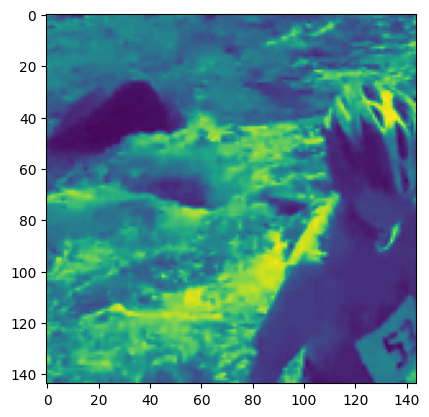

In [15]:
datapoint = dataset[377]
for k, v in datapoint.items():
    print(k, v.shape)
plt.imshow(datapoint["screen"][1,0])
dataset.shuffle_valid_screen_times()

In [16]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
imgs = []
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=8, 
                        shuffle=True, 
                        num_workers=12, 
                        persistent_workers=True, )
for b in tqdm(dataloader):
    pass

100% 740/740 [00:08<00:00, 84.70it/s]


In [9]:
100*16*8

12800

In [111]:
all_means = all_imgs.mean((1,2,3,4)).numpy()

In [112]:
darkest_imgs = np.argsort(all_means)

In [113]:
all_imgs[darkest_imgs[2]].max()

tensor(3., dtype=torch.float64)

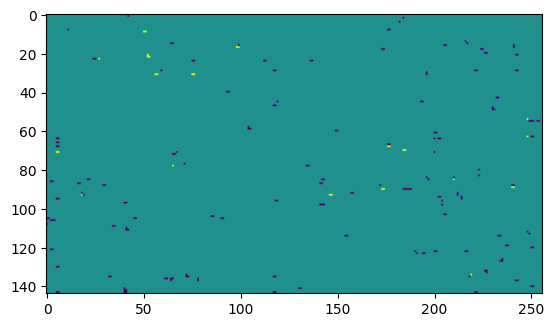

In [114]:
plt.imshow(all_imgs[darkest_imgs[2]].numpy()[8,0])

In [145]:
stim_types = np.array([i._meta_data.get("stim_type",0) for i in dataset._trials  ])

In [159]:
np.unique(stim_types)

array(['0', 'stimulus.Clip', 'stimulus.Frame',
       'stimulus.GaborGridSequence', 'stimulus.Monet2'], dtype='<U26')

In [170]:
 dataset._trials[1]._meta_data

{'condition_hash': 'QizYPq1QBeNhsZDVW7Pt',
 'first_frame_idx': 300,
 'image_size': [144, 256],
 'modality': 'video',
 'num_frames': 300,
 'stim_type': 'stimulus.Clip',
 'tier': 'train',
 'trial_idx': 1}

In [195]:
data_files = [i.data_file_name for i in dataset._trials]
meta_files = [i.file_name for i in dataset._trials]

In [196]:
meta_files[0]

PosixPath('/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/screen/meta/00000.yml')

In [201]:
conds

['stimulus.Clip']

In [324]:
tiers, imgs, conds, img_means, metas = [], [], [], [], []

for t in dataset._trials:
    cond = t._meta_data.get("stim_type",0)
    if cond:
        conds.append(cond)
        img = np.load(t.data_file_name)
        imgs.append(img)
        img_means.append(img.mean())
        tiers.append(t._meta_data.get("tier",0))
        metas.append(t._meta_data)

In [253]:
imgs[0].shape

(300, 144, 256)

In [319]:
np.argsort(img_means)[:50]

array([ 903,  390,  159,  196,  707,  500,  359,  357,  323,   26,  245,
        576,  830,  161,  418,  132,   54, 1003,  383, 1137,  266,  327,
        665,  606,  702,  852,  918,  387,  701,  544, 1254,  722, 1107,
        974,  808,  270, 1136,  215,  598,  711,  157,  716,  718,  242,
        900,  931,  815,  439,  198,   91])

In [328]:
metas[327]

{'condition_hash': 'v53/fS8Fa8K7xvui78RZ',
 'first_frame_idx': 44856,
 'image_size': [144, 256],
 'modality': 'video',
 'num_frames': 300,
 'stim_type': 'stimulus.Clip',
 'tier': 'train',
 'trial_idx': 327}

In [326]:
metas[390]

{'condition_hash': 'RpASnZGZ/wXhslU/OxGr',
 'first_frame_idx': 51996,
 'image_size': [144, 256],
 'modality': 'video',
 'num_frames': 300,
 'stim_type': 'stimulus.Clip',
 'tier': 'test',
 'trial_idx': 390}

In [325]:
metas[903]

{'condition_hash': 'RpASnZGZ/wXhslU/OxGr',
 'first_frame_idx': 147144,
 'image_size': [144, 256],
 'modality': 'video',
 'num_frames': 300,
 'stim_type': 'stimulus.Clip',
 'tier': 'test',
 'trial_idx': 903}

In [321]:
imgs[159][203].mean()

np.float32(2.398329)

In [323]:
tiers[159]

'test'

In [337]:
imgs[91].mean()

np.float32(31.645578)

(np.float64(-0.5), np.float64(255.5), np.float64(143.5), np.float64(-0.5))

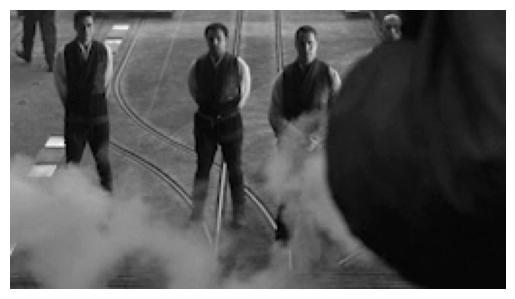

In [336]:
plt.imshow(imgs[91][200], cmap="gray")
plt.axis("off")

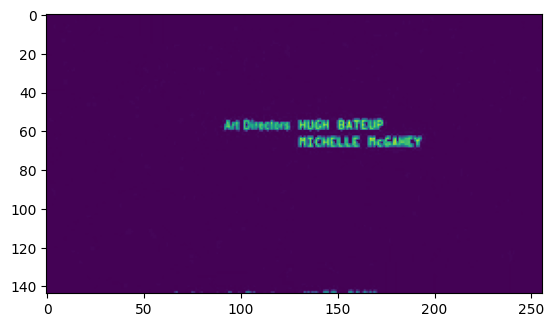

In [309]:
plt.imshow(imgs[903][215])

In [202]:
t.data_file_name

PosixPath('/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/screen/data/00000.npy')

In [188]:
p = data_files[0]

In [192]:
p.with_suffix('.yml')

PosixPath('/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/screen/data/00000.yml')

In [161]:
f = "/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/screen/data/00147.npy"

In [ ]:
5


In [ ]:
00000.npy

In [147]:
np.unique(stim_types)

array(['0', 'stimulus.Clip', 'stimulus.Frame',
       'stimulus.GaborGridSequence', 'stimulus.Monet2'], dtype='<U26')

In [ ]:
all_means

In [117]:
all_means.mean()

np.float64(95.39872248749543)

In [31]:
all_imgs.std()

tensor(62.2854, dtype=torch.float64)

In [73]:
dataset._experiment.devices["screen"].trials[4].interleave_value

128.0

In [13]:
!pip install pyrootutils

In [14]:
import pyrootutils

In [11]:
dataset._trials[0]._meta_data

{'condition_hash': 'cQPM8dYeqoaHnKd4sNvl',
 'first_frame_idx': 0,
 'image_size': [144, 256],
 'modality': 'video',
 'num_frames': 300,
 'stim_type': 'stimulus.Clip',
 'tier': 'train',
 'trial_idx': 0}

In [82]:
len(dataset._experiment.devices["screen"].trials)

2461

In [93]:
type(dataset._experiment.devices["screen"].trials[:10][0]).__name__

'VideoTrial'

In [ ]:
dataset

In [ ]:
dataset._experiment.devices["screen"].trials[:10]

In [ ]:
dataset._experiment.devices["screen"].trials[:10]

In [80]:
dataset._start_times.shape

(2461,)

In [ ]:
data

In [77]:
dataset._valid_screen_times[:20] - dataset._start_times[4]

array([-38.91856551, -38.66856551, -36.79356551, -36.66856551,
       -36.54356551, -36.29356551, -35.79356551, -35.16856551,
       -33.54356551, -32.54356551, 254.20643449, 255.58143449,
       255.95643449, 258.33143449, 355.08143449, 355.45643449,
       356.45643449, 357.95643449, 358.20643449, 358.33143449])

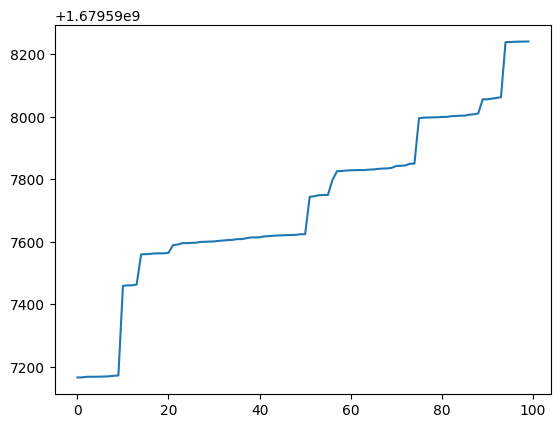

In [79]:
plt.plot(dataset._valid_screen_times[:100])

In [5]:
dataset._experiment.devices["screen"].trials[0].__class__.__name__

'VideoTrial'

In [18]:
[i.__class__.__name__ for i in dataset._trials][:10]

['VideoTrial',
 'VideoTrial',
 'VideoTrial',
 'VideoTrial',
 'BlankTrial',
 'ImageTrial',
 'BlankTrial',
 'BlankTrial',
 'ImageTrial',
 'BlankTrial']

In [19]:
for k in range(200):
    if (dataset._tiers[k]=="blank") & (dataset._tiers[k+1]=="train"):
        print("blank before train", k)
    if (dataset._tiers[k+1]=="blank") & (dataset._tiers[k]=="train"):
        print("blank after train", k)

blank after train 3
blank after train 35
blank before train 96
blank after train 150


In [116]:
import torch
from torch import nn

In [119]:
yo =nn.Embedding(100,1).to(torch.bfloat16)

In [124]:
yo(torch.tensor([10],))

tensor([[0.4434]], dtype=torch.bfloat16, grad_fn=<EmbeddingBackward0>)

In [135]:
(np.array(dataset._tiers)=="validation")

array([False, False, False, ..., False, False, False])

In [165]:
dataset._trials[]

SyntaxError: invalid syntax (3532584661.py, line 1)

In [137]:
np.array(dataset._trials)[(np.array(dataset._tiers)=="validation")].shape

(36,)

In [ ]:
360

In [3]:
root_folder = "/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/"
sampling_rate = 8  # Hz
chunk_size = 16 
tier="test"
sample_stride=8
include_blanks=True
dataset = ChunkDataset(root_folder=root_folder, 
                       chunk_size=chunk_size, 
                       sampling_rate=sampling_rate,
                      tier=tier,
                      sample_stride=sample_stride,
                      include_blanks=include_blanks,)

In [15]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=16, 
                        shuffle=True, 
                        num_workers=0, 
                        persistent_workers=0)
for b in tqdm(dataloader):
    #print((b["screen"][:,:,0,0,:4] == np.array([128,128,128,128])).sum())
    pass

  0% 0/228 [00:00<?, ?it/s]


NameError: name 'askdgasd' is not defined

In [18]:
dataset.

AttributeError: 'SimpleChunkedDataset' object has no attribute 'trials'

In [10]:
dataset.shuffle_valid_screen_times()

In [6]:
%debug

> /data/experanto/experanto/datasets.py(326)__getitem__()
    324         times = np.linspace(s, s + self.chunk_s, self.chunk_size, endpoint=False)
    325         data, _ = self._experiment.interpolate(times)
--> 326         asdsad
    327         phase_shifts = self._experiment.devices["responses"]._phase_shifts
    328         timestamps_neurons = (times - times.min())[:, None] + phase_shifts[None, :]



ipdb>  times.shape


(16,)


ipdb>  np.diff(times)


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125])


ipdb>  q


In [ ]:
np.linspace

In [12]:
%debug

> /data/experanto/experanto/datasets.py(324)__getitem__()
    322         s = self._valid_screen_times[idx]
    323         times = np.linspace(s, s + self.chunk_s, self.chunk_size + 1)[:self.chunk_size]
--> 324         asdasd
    325         data, _ = self._experiment.interpolate(times)
    326         phase_shifts = self._experiment.devices["responses"]._phase_shifts



ipdb>  times.shape


(16,)


ipdb>  np.diff(times)


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125])


ipdb>  times = np.linspace(s, s + self.chunk_s, self.chunk_size, endpoint=False)
ipdb>  np.diff(times)


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125])


ipdb>  q


In [51]:
config = {
    "screen": {"rescale": True, "normalize": False},
    "responses": {
        "keep_nans": True,
        "interpolation_mode": "nearest_neighbor",
    },
    "eye_tracker": {
        "keep_nans": True,
        "interpolation_mode": "nearest_neighbor",
    },
    "treadmill": {
        "keep_nans": True,
        "interpolation_mode": "nearest_neighbor",
    },
}

In [52]:
#root_folder = "/data/mouse_datasets/dynamic29228-2-10-Video-sensorium23_full_256_144/"
root_folder = "/data/mouse_polly/dynamic29515-10-12-Video-full/"
sampling_rate = 8  # Hz
chunk_size = 16 
tier="train"
sample_stride=16
include_blanks=True
dataset = ChunkDataset(root_folder=root_folder, 
                               chunk_size=chunk_size, 
                               sampling_rate=sampling_rate,
                               sample_stride=sample_stride,
                               tier=tier,
                               interp_config=config,
                               include_blanks=include_blanks,
                      )

In [68]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = MultiEpochsDataLoader(dataset, 
                        batch_size=16, 
                        shuffle=True, 
                        num_workers=12, 
                        persistent_workers=True)
for b in tqdm(dataloader):
    #print((b["screen"][:,:,0,0,:4] == np.array([128,128,128,128])).sum())
    pass

/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWarning: Image size changes aspect ratio.
  askdgasd
/data/experanto/experanto/interpolators.py:385: UserWar

# todos today

In [ ]:
- check if blanks are actually there
- redo train/val logic
- add transforms
- add config logic

In [101]:
300000/1e3

300.0

In [102]:
8*24

192

In [103]:
5*300

1500